## EE 461P: Data Science Principles  
### Assignment 4 
### Total points: 80
### Due: April 6, 2021 submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline). You can also follow the below steps to embed an image,
* Set cell mode to Markdown
* Drag and drop your image into the cell. The following command will be created:
`![image.png](attachment:image.png)` 
* Execute/Run the cell and the image will be displayed. Once you submit make sure to download the notebook and verify if the image exists.

### Name(s) and EID(s):
1. 
2. 

### Homework group No.: 


`NOTE : Fill the Name and EID section along with group number without fail.`

In [ ]:
# Upgrade scikit learn to the latest version
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


# Question 1 (Data Imputation and Feature Selection) (15 pts)

In this question, we will explore how to impute missing values in a given dataset and perform feature engineering. 

We will be using the WHO Life Expectancy Data, which measures the life expectancy from health factors for 193 countries collected from the WHO data repository website and its corresponding economic data collected from United Nation website. More information on the dataset can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who).Use the below code to load the dataset, the predictor variable is "Life Expectancy" and the rest are the feature variables. 

`orig_df` contains data from all years except 2014 and `orig_df_2014` contains data from only 2014. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import plot_roc_curve 
import matplotlib.pyplot as plt

# Load the dataset from csv files
orig_df = pd.read_csv("Life Expectancy Data.csv")
orig_df = orig_df[(orig_df['Life_expectancy'].notna()) & (orig_df['Year'] != 2015)]

# Select only 2014 data
orig_df_2014 = orig_df[orig_df['Year']== 2014]

# Drop the year column
orig_df_2014 = orig_df_2014.drop(columns=["Year"])




* **Part 1** : Report the datatype of the column values in the `orig_df_2014` dataframe, this helps to identify the categorical, numerical feature variables present in the dataset. Drop the categorical columns in the `orig_df_2014` dataset and create a new dataframe with only numerical valued columns and name it `numerical_df_2014`. Print the number of missing values(NaN) for each column in this `numerical_df_2014` dataframe.  **(1 pts)**

* **Part 2** : In this part we will explore different ways to handle missing data, you can make use of the pandas dataframe's function available, refer [here](https://pandas.pydata.org/docs/reference/frame.html).
  
  * a) Create a copy of the numerical_df_2014 dataframe and name it `numerical_df_na_drop_row`. Drop all the NaN rows in `numerical_df_na_drop_row`, then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score. **(2 pts)**

  * b) Next, Create another copy of the numerical_df_2014 dataframe and name it `numerical_df_na_fill_zero`. Now, fill the NaN values with zeros in `numerical_df_na_fill_zero`, then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score.**(2 pts)**

  * c) Finally, Create a copy of the numerical_df_2014 dataframe and name it `numerical_df_na_drop_cols`. Drop all the features(columns) which contain NaN values in `numerical_df_na_drop_cols` then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score.**(2 pts)**

  * d) Compare the test ${R^2}$ score value obtained in part a), b) and c) explain what you observe in the scores, provide reasoning on which is your preferred method to handle missing data and why? **(2 pts)**

* **Part 3** (Feature selection): In this part we will be using the  `numerical_df_na_drop_row` dataframe created by dropping all NaN samples in part 2a). Split this dataset into train:test split of 70:30 with random_state 42 and use the training data for the sub-parts below:

  * a) Compute the correlation of all the feature variables with the predictor variable(Life_expectancy). Report the five most correlated feature variable with the predictor using training data. (**1pts**)

  * b) Use Linear Regression as an estimator for Recursive Feature Selection. We will use Sequential Feature Selector to perform `forward` feature selection. Details on how to use Sequential Feature Selector is given [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html). Report the top five features selected after performing forward selection using training data.(**2pts**)

  * c) Use Decision Tree Regressor with random_state=20 from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) with default parameters and fit the model on training data. Identify the feature importance from the fitted model and report the 5 most important features. (**1pts**)

  * d) Use the most common set of features obtained from the feature selection methods in part a) b) and c). Train a linear regression model on this subset of features by fitting it on train data and reporting the ${R^2}$ score on test data. Briefly eplain what you understand by feature selection and how it affects the model performance based on the results obtained.(**2pts**)

      `NOTE : Most common set indicates most common feature intersection, i.e. features present in all three cases.`



# Part 1 

In [ ]:
print("Column types present")
print(orig_df_2014.dtypes)

numerical_df_2014 = orig_df_2014.drop(columns=["Country","Status"])
print("Missing values in columns")
print(numerical_df_2014.isna().sum())

Column types present
Country                             object
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
thinness_1_19_years                float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object
Missing values in columns
Life_expectancy                     

# Part 2 a)

In [ ]:
# Drop Nan rows 

numerical_df_na_drop_row = numerical_df_2014.dropna()
y = numerical_df_na_drop_row['Life_expectancy']
X = numerical_df_na_drop_row.drop(columns=['Life_expectancy'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

reg = LinearRegression()
reg.fit(X_train,Y_train)
print("Dropped Nan Rows",reg.score(X_test,Y_test))
r_squared = reg.score(X_test,Y_test)
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R^2",adjusted_r_squared)

Dropped Nan Rows 0.8701727711225993
Adjusted R^2 0.7588922892276844


# Part 2 b)

In [ ]:
# Drop Nan rows 

numerical_df_na_fill_zero = numerical_df_2014.fillna(value=0)
y = numerical_df_na_fill_zero['Life_expectancy']
X = numerical_df_na_fill_zero.drop(columns=['Life_expectancy'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)


reg = LinearRegression()
reg.fit(X_train,Y_train)
print("Filled Nan rows",reg.score(X_test,Y_test))
r_squared = reg.score(X_test,Y_test)
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R^2",adjusted_r_squared)

Filled Nan rows 0.8179646801641982
Adjusted R^2 0.7269470202462973


#Part 2 c)

In [ ]:
numerical_df_2014_drop_cols = numerical_df_2014.dropna(axis=1, how="any")
y = numerical_df_2014_drop_cols['Life_expectancy']
X = numerical_df_2014_drop_cols.drop(columns=['Life_expectancy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
regr = LinearRegression().fit(X_train, y_train)
print("Dropped features Score {}".format(regr.score(X_test, y_test)))
r_squared = regr.score(X_test,y_test)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R^2",adjusted_r_squared)

Dropped features Score 0.7023537475768191
Adjusted R^2 0.6505891819380051


# Part 2 d)

The R^2 score values is summarized below, 

* Dropped NaN samples(rows) - 0.8701
* Filled NaN samples(rows) value with zero - 0.8179
* Dropped features - 0.7023

We, can see that the when features are dropped the model performance drastically reduces, this is due to the loss of information caused by dropping the columns which contain NaN values. We can see the performance is best when we drop the NaN samples compared to filling it with zero. 

# Part 3 a)

In [ ]:

y = numerical_df_na_drop_row['Life_expectancy']
X = numerical_df_na_drop_row.drop(columns=['Life_expectancy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

df = X_train.copy()
df["Life_expectancy"] = y_train
df.corr()
print("The top 5 correlated features are,Adult_Mortality,Schooling,Income_Composition,BMI,HIV_AIDS")

The top 5 correlated features are,Adult_Mortality,Schooling,Income_Composition,BMI,HIV_AIDS


# Part 3 b)

In [ ]:
estimator = LinearRegression()
selector = SequentialFeatureSelector(estimator, n_features_to_select=5, direction='forward')
selector = selector.fit(X_train, y_train)
X_train.iloc[:,selector.support_]
print("Features selected by Sequential forward selection",X_train.iloc[:,selector.support_].columns)

Features selected by Sequential forward selection Index(['Adult_Mortality', 'Alcohol', 'HIV_AIDS', 'GDP',
       'Income_composition_of_resources'],
      dtype='object')


# Part 3 c)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=20)
tree_reg.fit(X_train,y_train)
imp = tree_reg.feature_importances_

ids = imp.argsort()[::-1][:5]
print("Features selected by decision tree feature importance selection",X_train.iloc[:,ids].columns)


Features selected by decision tree feature importance selection Index(['HIV_AIDS', 'Income_composition_of_resources', 'under_five_deaths',
       'Measles', 'Adult_Mortality'],
      dtype='object')


# Part 3 d)

In [ ]:
print("The common selected features by the above methods are, HIV_AIDS,Income_composition_of_resources,Adult_Mortality,Income_composition_of_resources")

y = numerical_df_na_drop_row['Life_expectancy']
X = numerical_df_na_drop_row.drop(columns=['Life_expectancy'])

X = X.iloc[:,[0,11,16]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


reg = LinearRegression()
reg.fit(X_train,y_train)
print("Feature selected R^2 - Score",reg.score(X_test,y_test))
r_squared = reg.score(X_test,y_test)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R^2",adjusted_r_squared)

The common selected features by the above methods are, HIV_AIDS,Income_composition_of_resources,Adult_Mortality,Income_composition_of_resources
Feature selected R^2 - Score 0.8615252395088692
Adjusted R^2 0.8499856761346083


# Question 2 (15 pts) - Principal Component Analysis

In this problem we will be applying PCA on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

Use Principal Component Analysis (PCA) to solve this problem.  

* **2.1 (1 pt)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q2data.csv" file provided as a dataframe df. 

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    
* **2.2 (3 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively). 

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

* **2.3 (4 pts)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

* **2.4 (4 pts)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and report the ${R^2}$ score on the test dataset. Comment on how the score varies as the number of components increase.(There will be a total of 5 ${R^2}$ score).

* **2.5 (3 pts)** Visualizing principal components : For this part use a small subset of 50 samples of the training dataset and plot the first three principal components, i.e first plot PC1 vs. PC2 (i.e. the projection of the data onto the 2-D space defined by the first two Principal Components) and also PC2 vs PC3 in both these plot color the projected points according to the corresponding ground truth labels. Do you observe any pattern in the plot?


# Solution 2

In [ ]:
df = pd.read_csv("Q2data.csv")


(3,)
Cumulative variance explained by 3 components is 58.9
(20,)
Cumulative variance explained by 20 components is 96.7
(40,)
Cumulative variance explained by 40 components is 99.39999999999995
(60,)
Cumulative variance explained by 60 components is 99.39999999999995
(81,)
Cumulative variance explained by 81 components is 99.39999999999995


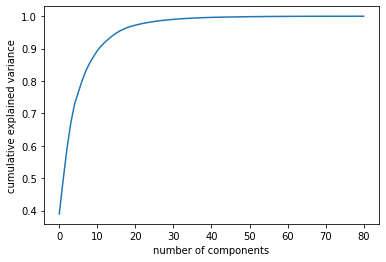

In [ ]:
# Solution 2.1
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Solution 2.2
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    pca = PCA(n_components=num)
    pca_fitter = pca.fit(X_train)
    X_train_new = pca_fitter.transform(X_train)
    percent_variance = np.round(pca_fitter.explained_variance_ratio_* 100, decimals =2)
    var=np.cumsum(np.round(pca_fitter.explained_variance_ratio_, decimals=3)*100)
    print(var.shape)
    print("Cumulative variance explained by {} components is {}".format(num,var[num-1])) #cumulative sum of variance explained with [n] features

# Solution 2.3
plt.plot(np.cumsum(pca_fitter.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


In [ ]:
X.shape

(21263, 81)

In [ ]:
# Solution 2.4
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    pca = PCA(n_components=num)
    pca_fitter = pca.fit(X_train)
    X_train_new = pca_fitter.transform(X_train)
    X_test_new = pca_fitter.transform(X_test)
    percent_variance = np.round(pca_fitter.explained_variance_ratio_* 100, decimals =2)
    var=np.cumsum(np.round(pca_fitter.explained_variance_ratio_, decimals=3)*100)
    #print(var) #cumulative sum of variance explained with [n] features
    reg = LinearRegression().fit(X_train_new,Y_train)
    print("R^2 score {} with num_components {}".format(reg.score(X_test_new,Y_test),num))
    r_squared = reg.score(X_test_new,Y_test)
    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_new.shape[1]-1)
    print("Adjusted R^2",adjusted_r_squared)

R^2 score 0.48919373231934193 with num_components 3
Adjusted R^2 0.4889533528992569
R^2 score 0.6215114137395334 with num_components 20
Adjusted R^2 0.620320823660073
R^2 score 0.6865443065343928 with num_components 40
Adjusted R^2 0.6845660440322432
R^2 score 0.7145333205439319 with num_components 60
Adjusted R^2 0.7118223359337128
R^2 score 0.7281437989396424 with num_components 81
Adjusted R^2 0.7246468397073272


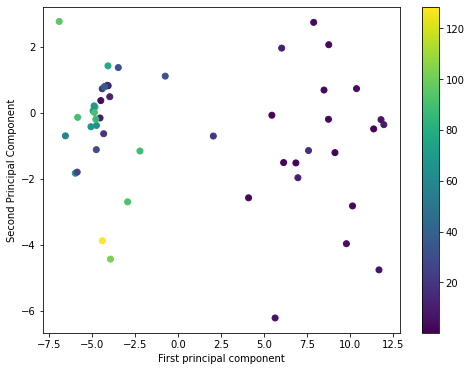

In [ ]:
# Solution 2.5
pca = PCA(n_components=3)
pca_fitter = pca.fit(X_train)
x_pca = pca_fitter.transform(X_train)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[0:50,0],x_pca[0:50,1],c=Y_train[0:50])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar()

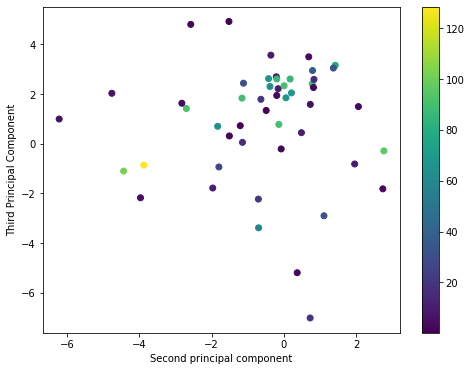

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[0:50,1],x_pca[0:50,2],c=Y_train[0:50])
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.colorbar()

There is no clear pattern in the plots of first three Principal components, this might be due to the fact that the first three components are not enough to explain the total variance in the dataset. This is also observed in the cumulative variance value explained with the 3 components is 58.9

# Question 3 - Expected Loss Minimization (15 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

# Answer 3
Let $f(x) = P(C_1 | x)$  
Computing expected loss for all decisions:

For decision $C_1$, $E[loss] = 0\times f(x) + 2\times (1-f(x))$

For decision $C_2$, $E[loss] = 3\times f(x) + 0\times (1-f(x))$

For decision $R$, $E[loss] = c\times f(x) + c\times (1-f(x))$

## Case 1:

\begin{align}
c = 0 \\
\because 0 \le f(x) \le 1\\
\min{\{2\times (1-f(x)), 3\times f(x), 0\}} = 0\\
\therefore \text{Predict or select Reject for all instances}
\end{align}

## Case 2:  
c = 2  
For $f(x)$ between $[0, \frac{2}{5})$
\begin{align}
3f(x) \lt 2(1-f(x)) \text{ and } 3f(x) \lt 2\\
\text{so, predict } C_2.
\end{align}

For $f(x)$ between $[\frac{2}{5}, 1]$
\begin{align}
2(1-f(x)) \lt 3f(x) \text{ and } 2(1-f(x)) \lt 2\\
\text{so, predict } C_1.
\end{align}

## Case 3
c = 1  
For $f(x)$ in $[0, \frac{1}{3})$  
\begin{align}
3f(x) < 2(1-f(x)) \text{ and } 3f(x) \lt 1\\
\text{so, predict } C_2.
\end{align}

For $f(x)$ in $[\frac{1}{3}, \frac{1}{2})$  
\begin{align}
3f(x) \gt 1 \text{ and } 2(1-f(x)) \gt 1\\
\text{so, select Reject.}
\end{align}

for $f(x)$ in $[\frac{1}{2}, 1]$  
\begin{align}
2(1-f(x)) \lt 3f(x) \text{ and } 2(1-f(x)) \lt 1\\
\text{so, predict } C_1.
\end{align}


# Question 4 (20 pts) - Decision Tree Classifier using sklearn

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [2]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,-1.0


In [3]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build decision trees with depths 2, 5, 10, 20 and max depth using gini and entropy criterion; report the train and test errors. Refer to [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most [important feature](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for the tree with depth=2 and criterion=gini and [plot the tree](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py). Name this tree model as `dt2`.

d. **(6 pts)** Report the accuracy and AUC for the test data and [plot the ROC curve](https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/21_plot_roc_curve.ipynb) using `dt2`.


# Answer 4

In [4]:
# Decision tree with depth = 2,3,5,10, full depth - GINI (default)
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
depths = [2, 5, 10, 20, None]
for depth in depths:
  dt = tree.DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, Y_train)
  dt_score_train = dt.score(X_train, Y_train)
  dt_score_test = dt.score(X_test, Y_test)
  if not depth:
      depth = 'Max'
  print(f'Depth = {depth}, Training score = {dt_score_train:.02f}, Testing score = {dt_score_test:.02f}')

depth      Training score       Testing score       
Depth = 2, Training score = 0.73, Testing score = 0.73
Depth = 5, Training score = 0.80, Testing score = 0.78
Depth = 10, Training score = 0.86, Testing score = 0.79
Depth = 20, Training score = 0.98, Testing score = 0.74
Depth = Max, Training score = 1.00, Testing score = 0.73


In [5]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
depths = [2, 5, 10, 20, None]
for depth in depths:
  dt = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=depth)
  dt.fit(X_train, Y_train)
  dt_score_train = dt.score(X_train, Y_train)
  dt_score_test = dt.score(X_test, Y_test)
  if not depth:
      depth = 'Max'
  print(f'Depth = {depth}, Training score = {dt_score_train:.02f}, Testing score = {dt_score_test:.02f}')

depth      Training score       Testing score       
Depth = 2, Training score = 0.73, Testing score = 0.73
Depth = 5, Training score = 0.75, Testing score = 0.75
Depth = 10, Training score = 0.82, Testing score = 0.79
Depth = 20, Training score = 0.94, Testing score = 0.76
Depth = Max, Training score = 1.00, Testing score = 0.73


## (b)

It is seen that, greater the depth, training score increases and matches perfects with the training data set. However higher the depth the tree goes, it overfit to the training data set. So it's no use keep increasing the tree depth. According to above observations, tree with a depth of 10 seems more reasonable as both training and test scores are reasonably high.

In [6]:
# Part c

features = X_train.columns.tolist()
# Investigate most important features with depth = 2
dt2 = tree.DecisionTreeClassifier(max_depth=2)
# Fit the decision tree classifier
dt2.fit(X_train, Y_train)
fi = dt2.feature_importances_
l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:.3f}'.format(features[i],fi[i]))

age................. 0.000
balance............. 0.000
duration............ 0.849
campaign............ 0.000
previous............ 0.000
default_cat......... 0.000
housing_cat......... 0.000
loan_cat............ 0.000
job_admin........... 0.000
job_blue-collar..... 0.000
job_entrepreneur.... 0.000
job_housemaid....... 0.000
job_management...... 0.000
job_retired......... 0.000
job_self-employed... 0.000
job_services........ 0.000
job_student......... 0.000
job_technician...... 0.000
job_unemployed...... 0.000
job_unknown......... 0.000
marital_divorced.... 0.000
marital_married..... 0.000
marital_single...... 0.000
education_primary... 0.000
education_secondary. 0.000
education_tertiary.. 0.000
education_unknown... 0.000
poutcome_failure.... 0.000
poutcome_other...... 0.000
poutcome_success.... 0.151
poutcome_unknown.... 0.000
recent_pdays........ 0.000


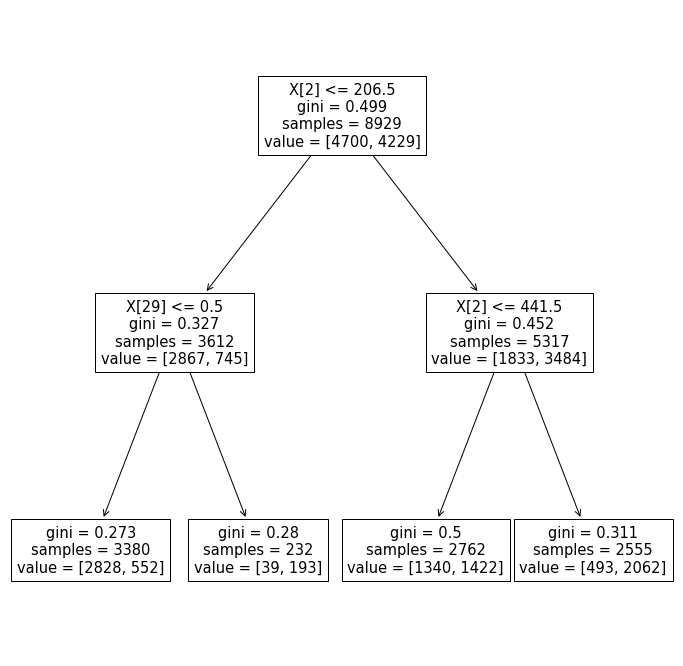

In [7]:
plt.figure(figsize=(12, 12,))
tree.plot_tree(dt2)
plt.show()

In [8]:
# Part d

# Make predictions on the test set
Y_pred = dt2.predict(X_test)

# Calculate accuracy
print(f"\nAccuracy score: {metrics.accuracy_score(Y_test, Y_pred):.3f}")


Accuracy score: 0.727


# Question 5 - Concepts (15 pts)

**Submit answers if these topics are covered in class before the deadline. Otherwise, you don't need to complete them.**

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart. How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value).

2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

# Answer 5
1. Text

2. Text